In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Problem Statement: For this challenge, we will be predicting multiple years worth of sales for various Kaggle-branded stickers from different fictitious stores in different (real!) countries. This dataset is completely synthetic, but contains many effects we see in real-world data, e.g., weekend and holiday effect, seasonality, etc.

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
data.duplicated().sum()

0

In [5]:
data.drop('id',axis=1,inplace=True)

Till now we import the training data into data variable and found that 6 columns are there and we check for the duplicates and do not found any so we are deleting independent feature id which have less significance to the model training. 

In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      230130 non-null  object 
 1   country   230130 non-null  object 
 2   store     230130 non-null  object 
 3   product   230130 non-null  object 
 4   num_sold  221259 non-null  float64
dtypes: float64(1), object(4)
memory usage: 62.0 MB


In [7]:
#for ignoring warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
data.isnull().sum()

date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [9]:
data.shape

(230130, 5)

Till now we got the idea that other than num_sold all the 4 features are of type object and do not contains any NaN values and num_sold is our target value

For dependent variable : num_sold

In [10]:
data.dropna(subset='num_sold',inplace=True)

In [11]:
data.shape

(221259, 5)

Till now dropping the nan values from the target as they do not give any learning and removing the row which have the nan values

In [12]:
data.isnull().sum()

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

For date feature

In [13]:
data['date'].dtype

dtype('O')

In [14]:
#converting into date data type
data['date']=pd.to_datetime(data['date'])

In [15]:
data['date'].dtype

dtype('<M8[ns]')

Till now we convert date type from object to padas Date format

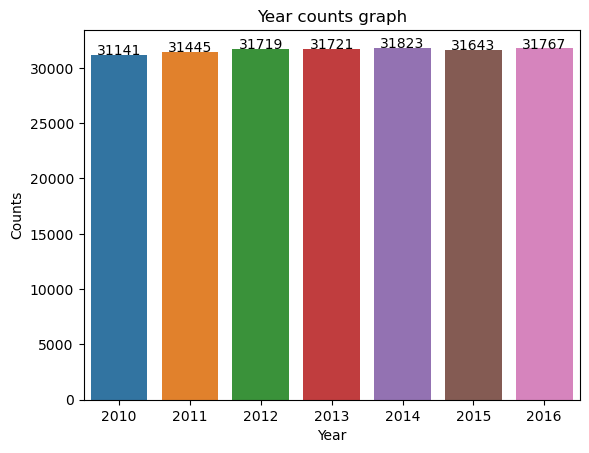

In [16]:
#for year counts
year_counts=data['date'].dt.year.value_counts()
sns.barplot(x=year_counts.index,y=year_counts.values)
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Year counts graph')
ax = plt.gca()  # Get current axes
for bar in ax.patches:  # Iterate over each bar
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2  # Center of the bar
    plt.text(bar_x, bar_height + 0.5, f'{bar_height:.0f}', ha='center', fontsize=10)
plt.show()

TIll now we check the values accorndingly to the year and got that 2012,2016 have larger number of counts because of the leap year and one extra days

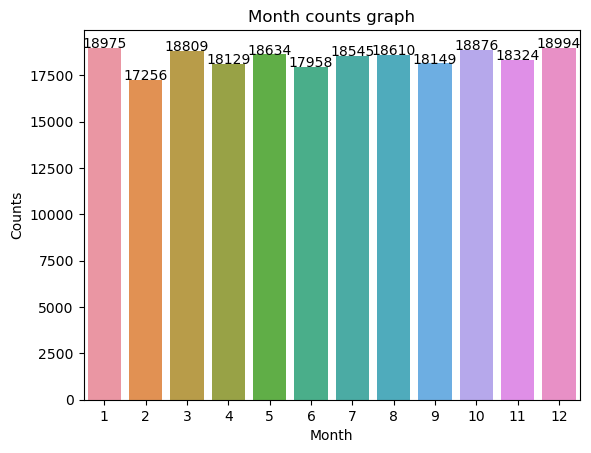

In [17]:
#for months
month_counts=data['date'].dt.month.value_counts()
sns.barplot(x=month_counts.index,y=month_counts.values)
plt.title('Month counts graph')
plt.xlabel('Month')
plt.ylabel('Counts')
ax = plt.gca()  # Get current axes
for bar in ax.patches:  # Iterate over each bar
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2  # Center of the bar
    plt.text(bar_x, bar_height + 0.5, f'{bar_height:.0f}', ha='center', fontsize=10)
plt.show()


Till now we got the ideas that month of january, march, may, july, august, october and december have the most counts because they go till 31 and february have less count because it has less days.

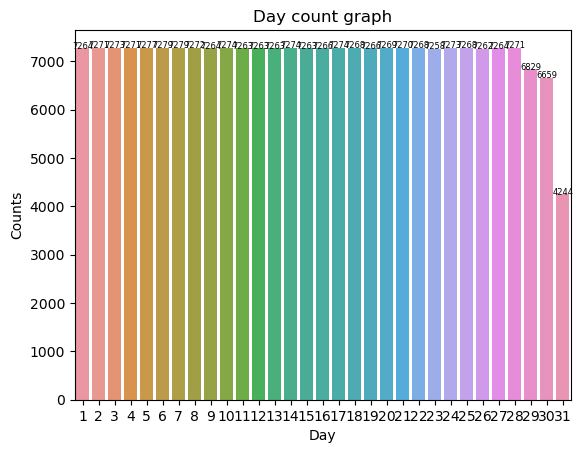

In [18]:
day_counts=data['date'].dt.day.value_counts()
sns.barplot(x=day_counts.index,y=day_counts.values)
plt.title("Day count graph")
plt.xlabel('Day')
plt.ylabel('Counts')
ax = plt.gca()  # Get current axes
for bar in ax.patches:  # Iterate over each bar
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2  # Center of the bar
    plt.text(bar_x, bar_height + 0.5, f'{bar_height:.0f}', ha='center', fontsize=6)
plt.show()


In [19]:
day_counts

date
6     7279
7     7279
5     7277
10    7274
14    7274
17    7274
3     7273
24    7273
8     7272
4     7271
28    7271
2     7271
21    7270
20    7269
22    7268
25    7268
18    7268
19    7266
16    7266
27    7264
1     7264
9     7264
15    7263
13    7263
12    7263
11    7263
26    7262
23    7258
29    6829
30    6659
31    4244
Name: count, dtype: int64

Till now when we plot the count according to the date wise then it is noticeable that every date have same number of 7560 and for 29,30 and 31 it decreases because february have 28 or sometimes 29 and 31 occurence does not come every month.

In [20]:
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.day

data.drop('date',axis=1,inplace=True)

In [21]:
data.head(2)

,country,store,product,num_sold,year,month,day
1,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1


Till now giving year, month and day a separate independent feature and deleting the date feture

In [22]:
data['year'].corr(data['num_sold'])

-0.040461809125248986

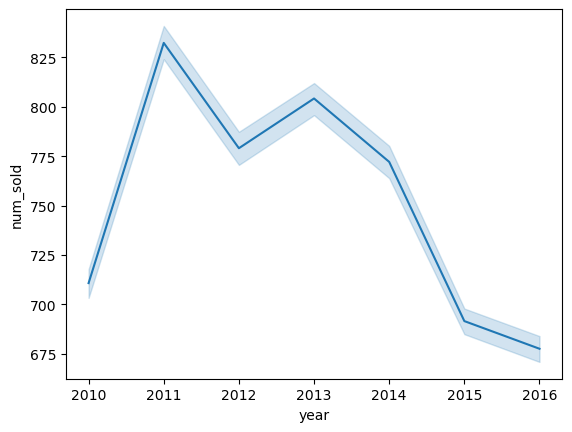

In [23]:
sns.lineplot(x=data['year'],y=data['num_sold'])
plt.show()

Acoording to the graph it is noticeable that in year 2011 the num of sold of stickers was highest

In [24]:
data['month'].corr(data['num_sold'])

-0.0062546180853285055

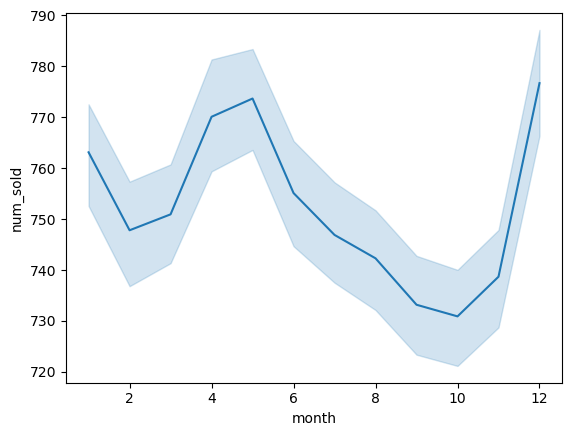

In [25]:
sns.lineplot(x=data['month'],y=data['num_sold'])
plt.show()

The month of december is the highest to be have num_sold

In [26]:
data['day'].corr(data['num_sold'])

0.0011365848368351072

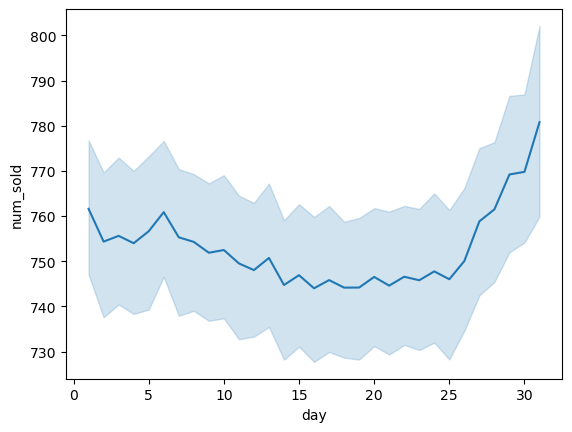

In [27]:
sns.lineplot(x=data['day'],y=data['num_sold'])
plt.show()

At 31 the number of the sold of sticker is increasing

Till now we got that the year and month is negatively correlated and day is positively correlated and 2011 have more sales and in month december contribute most and in day 31 shows increasingly data as compared to others

In [28]:
data.head(1)

,country,store,product,num_sold,year,month,day
1,Canada,Discount Stickers,Kaggle,973.0,2010,1,1


for country

In [29]:
data['country'].unique()

array(['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore'],
      dtype=object)

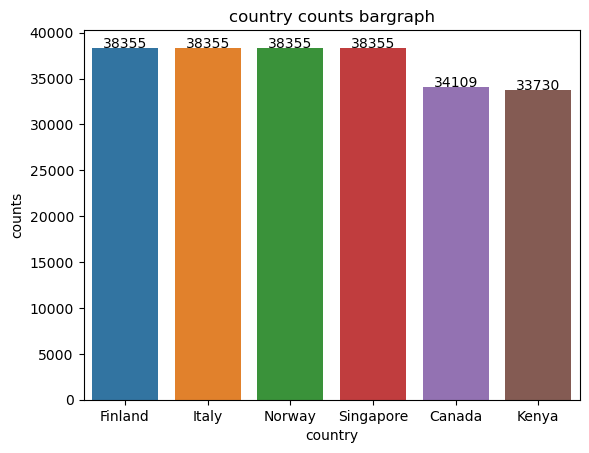

In [30]:
country_counts=data['country'].value_counts()
sns.barplot(x=country_counts.index,y=country_counts.values)
plt.xlabel('country')
plt.ylabel('counts')
plt.title('country counts bargraph')
ax = plt.gca()  # Get current axes
for bar in ax.patches:  # Iterate over each bar
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2  # Center of the bar
    plt.text(bar_x, bar_height + 0.5, f'{bar_height:.0f}', ha='center', fontsize=10)
plt.show()

In [31]:
data['country']=data['country'].map({'Canada':0, 'Finland':1, 'Italy':2, 'Kenya':3, 'Norway':4, 'Singapore':5}).values

Mapping the values of the object data type to int type

In [32]:
data['country'].corr(data['num_sold'])

0.12911324027248064

Positively correlated

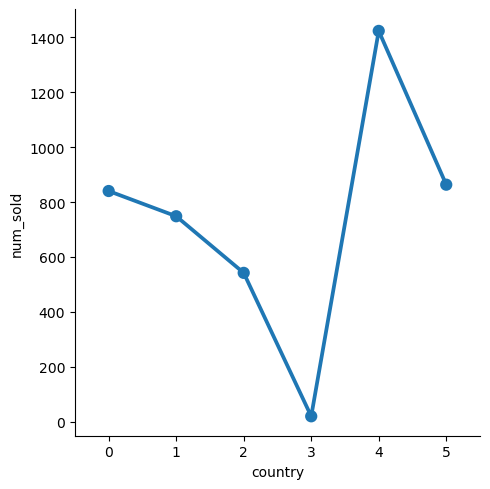

In [33]:
sns.catplot(x='country',y='num_sold',data=data,kind='point')
plt.show()

For norway the number of solds are greater than other country

In [34]:
data.head(1)

,country,store,product,num_sold,year,month,day
1,0,Discount Stickers,Kaggle,973.0,2010,1,1


For store

In [35]:
data['store'].unique()

array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
      dtype=object)

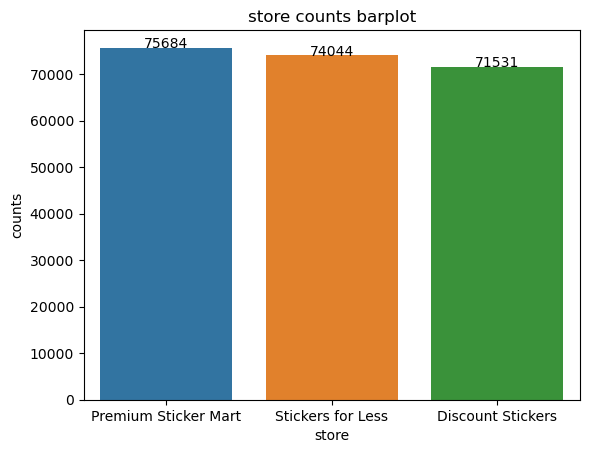

In [36]:
store_counts=data['store'].value_counts()
sns.barplot(x=store_counts.index,y=store_counts.values)
plt.title('store counts barplot')
plt.xlabel('store')
plt.ylabel('counts')
ax = plt.gca()  # Get current axes
for bar in ax.patches:  # Iterate over each bar
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2  # Center of the bar
    plt.text(bar_x, bar_height + 0.5, f'{bar_height:.0f}', ha='center', fontsize=10)
plt.show()

Premium sticker marts got the highest number of counts

In [37]:
data['store']=data['store'].map({'Discount Stickers':0, 'Stickers for Less':1, 'Premium Sticker Mart':2}).values

Mapping object typ to int type

In [38]:
data['store'].corr(data['num_sold'])

0.32104941585584096

Positively and strongly correlated

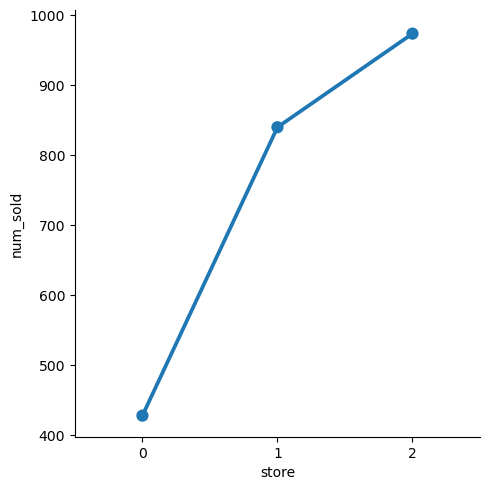

In [39]:
sns.catplot(x='store',y='num_sold',data=data,kind='point')
plt.show()

Discounted stickers are mostly sold

In [40]:
data.head(1)

,country,store,product,num_sold,year,month,day
1,0,0,Kaggle,973.0,2010,1,1


In [41]:
data['product'].unique()

array(['Kaggle', 'Kaggle Tiers', 'Kerneler', 'Kerneler Dark Mode',
       'Holographic Goose'], dtype=object)

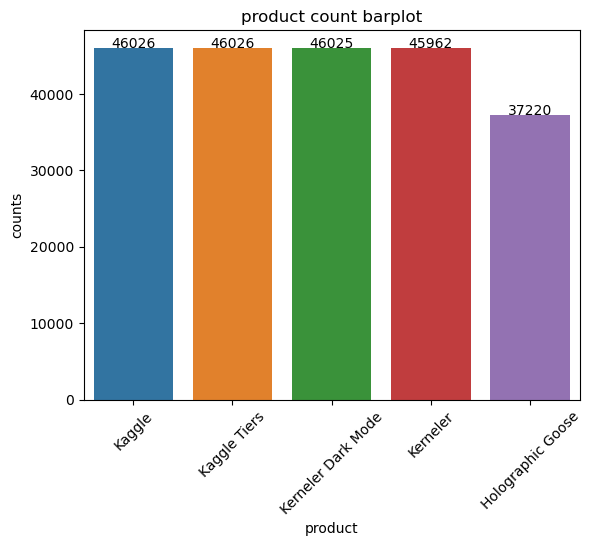

In [42]:
product_counts=data['product'].value_counts()
sns.barplot(x=product_counts.index,y=product_counts.values)
plt.title('product count barplot')
plt.xlabel('product')
plt.ylabel('counts')
plt.xticks(rotation=45)
ax = plt.gca()  # Get current axes
for bar in ax.patches:  # Iterate over each bar
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2  # Center of the bar
    plt.text(bar_x, bar_height + 0.5, f'{bar_height:.0f}', ha='center', fontsize=10)
plt.show()

Kaggle and Kaggle tiers have the most count

In [43]:
data['product']=data['product'].map({'Kaggle':0, 'Kaggle Tiers':1, 'Kerneler':2, 'Kerneler Dark Mode':3,
       'Holographic Goose':4}).values

Mapping the object values to int

In [44]:
data['product'].corr(data['num_sold'])

-0.4845954461716816

Negatively highly correlated

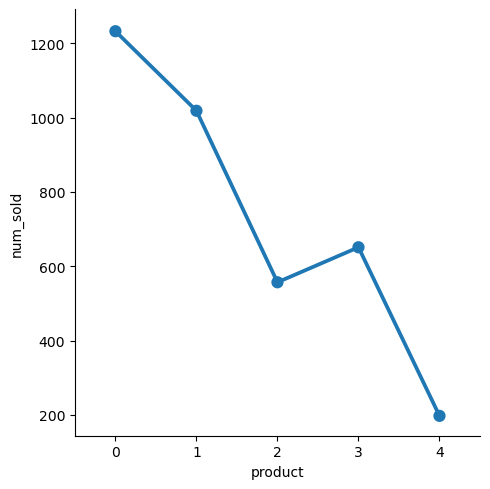

In [45]:
sns.catplot(x='product',y='num_sold',data=data,kind='point')
plt.show()

Kaggle stickers are majorly sold

In [46]:
data.head(1)

,country,store,product,num_sold,year,month,day
1,0,0,0,973.0,2010,1,1


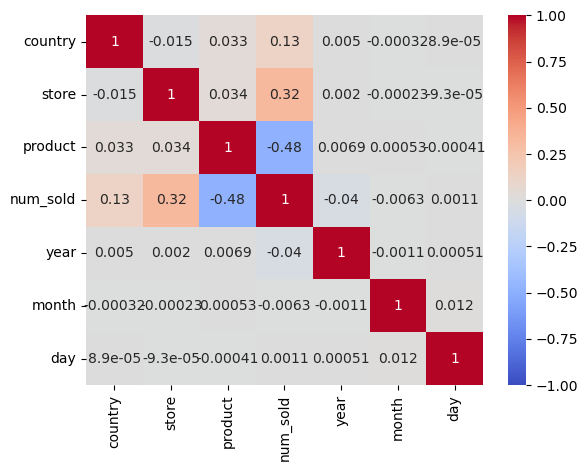

In [47]:
sns.heatmap(data.corr(),annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

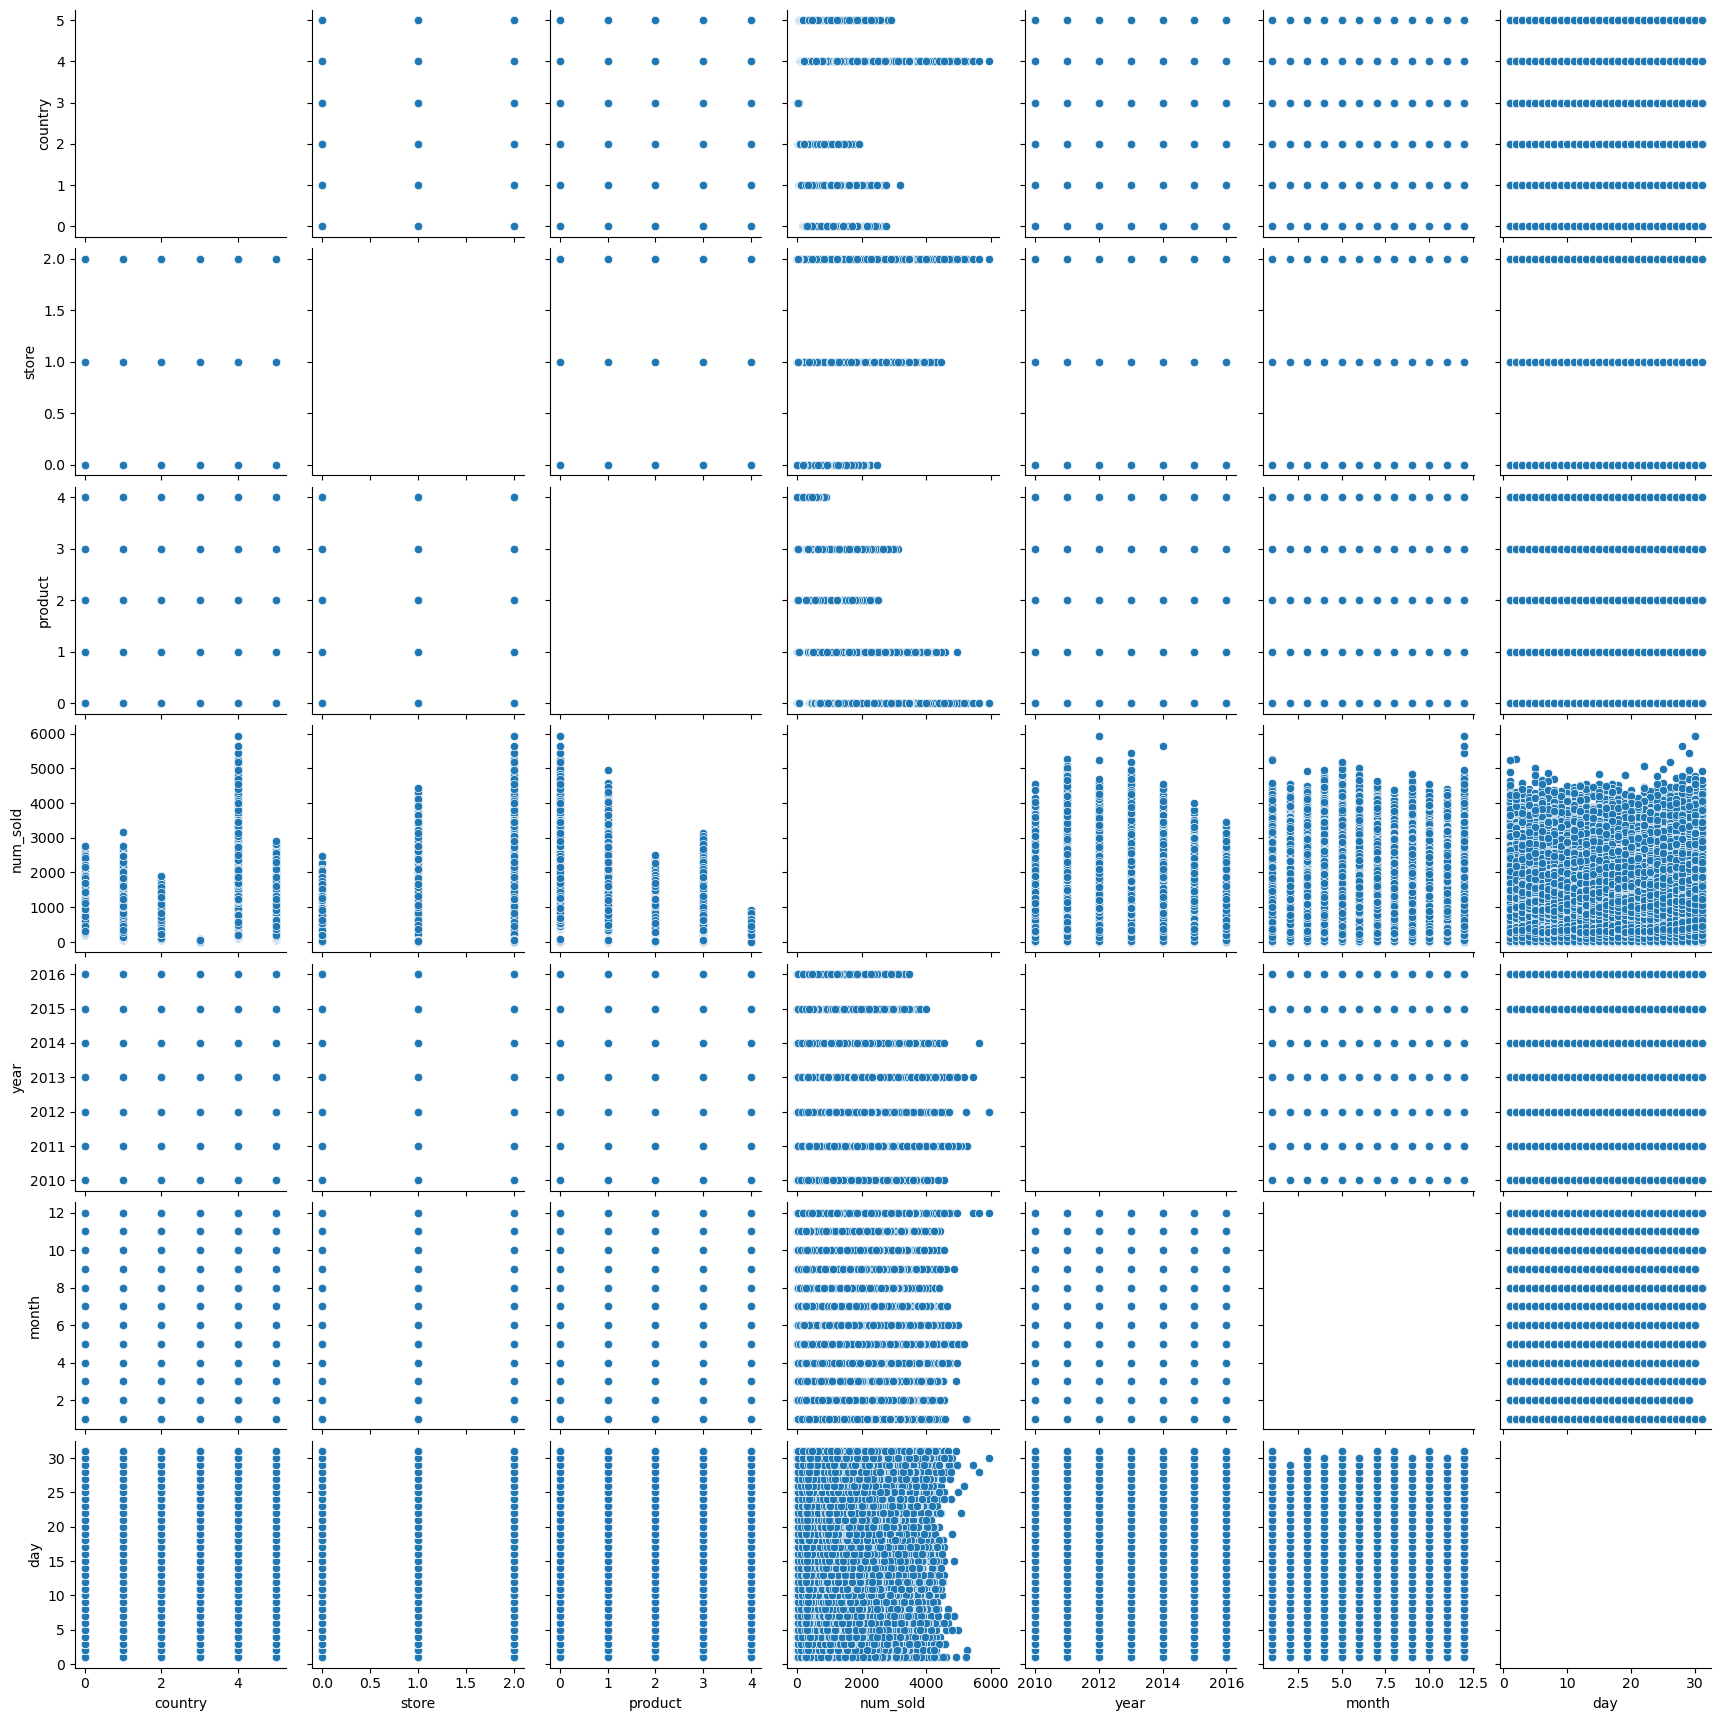

In [48]:
sns.pairplot(data, diag_kind="point")
plt.show()

Dividing into training, testing and validation set

In [46]:
x=data.drop('num_sold',axis=1)

In [47]:
y=data['num_sold']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [50]:
x_train.size

889458

In [51]:
x_test.size

438096

In [52]:
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [53]:
x_test.size

219048

In [54]:
x_val.size

219048

Divided the test and train size into train, test and validation set

Now checking for regression models

In [55]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_absolute_percentage_error

In [58]:
def check(model):
    y_pred=model.predict(x_val)
    #MAE returns errors if the error is less than good performance else not
    print("Mean Absolute Error: ", mean_absolute_error(y_val,y_pred))

    #r2_Score represents variance proportion if higher then good
    print("R2 score: ",r2_score(y_val,y_pred))

    #MAPE express error as the percentage and we can subtract from 100 to get thepercentage o non error.
    print("Percentage: ",100-mean_absolute_percentage_error(y_val,y_pred))
    
    

In [60]:
#linear regression tends to fit a best fit line and good for regression problems
from sklearn.linear_model import LinearRegression
check(LinearRegression().fit(x_train,y_train))

Mean Absolute Error:  380.83554369996654
R2 score:  0.3734295645000093
Percentage:  92.55520605505987


In [61]:
#knn finds the nearest neighbors and predict the result
from sklearn.neighbors import KNeighborsRegressor
check(KNeighborsRegressor().fit(x_train,y_train))

Mean Absolute Error:  154.56700997041744
R2 score:  0.876805189393106
Percentage:  98.22925138042162


In [62]:
#svm draws a hyperplane to havethe maximum distance in between hyperplanes
from sklearn.svm import SVR
check(SVR().fit(x_train,y_train))

Mean Absolute Error:  516.011109579867
R2 score:  -0.04494764398140605
Percentage:  92.6314575302118


In [63]:
#decision trees makes the tree out the values and find the result by going in depth of the tree
from sklearn.tree import DecisionTreeRegressor
check(DecisionTreeRegressor().fit(x_train,y_train))

Mean Absolute Error:  80.49901391475841
R2 score:  0.9568161402915727
Percentage:  99.89440330307723


In [64]:
#ensemble tequniques
from sklearn.ensemble import AdaBoostRegressor
check(AdaBoostRegressor().fit(x_train,y_train))

Mean Absolute Error:  385.4964293084676
R2 score:  0.6036543279044737
Percentage:  95.02712800809353


In [65]:
from sklearn.ensemble import BaggingRegressor
check(BaggingRegressor().fit(x_train,y_train))

Mean Absolute Error:  66.82380848033308
R2 score:  0.9716508630166764
Percentage:  99.91213922511861


In [66]:
from sklearn.ensemble import ExtraTreesRegressor
check(ExtraTreesRegressor().fit(x_train,y_train))

Mean Absolute Error:  63.66004805730772
R2 score:  0.9736850995844694
Percentage:  99.91523210499524


In [67]:
from sklearn.ensemble import GradientBoostingRegressor
check(GradientBoostingRegressor().fit(x_train,y_train))

Mean Absolute Error:  104.17871310973212
R2 score:  0.9480761165601476
Percentage:  98.90439643555175


In [68]:
from sklearn.ensemble import HistGradientBoostingRegressor
check(HistGradientBoostingRegressor().fit(x_train,y_train))

Mean Absolute Error:  63.460867144054475
R2 score:  0.9771783999414413
Percentage:  99.76215692933226


In [69]:
from sklearn.ensemble import RandomForestRegressor
check(RandomForestRegressor().fit(x_train,y_train))

Mean Absolute Error:  64.78186780979512
R2 score:  0.9734593603686077
Percentage:  99.91470541147008


In [ ]:
from catboost import CatBoostRegressor
check(CatBoostRegressor().fit(x_train,y_train))

In [71]:
from lightgbm import LGBMRegressor
check(LGBMRegressor().fit(x_train,y_train))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 148243, number of used features: 6
[LightGBM] [Info] Start training from score 751.896609
Mean Absolute Error:  63.58634011496886
R2 score:  0.9771624570438195
Percentage:  99.75604770310244


By the following models metrics square 5 models which performs best are: Catboost,LGBM,ExtraTreeRegressor,RandomForest,HistGradient

Now selecting best hyperparameters using grid search cv

In [135]:
from catboost import CatBoostRegressor

In [136]:
CatBoostRegressor()

In [137]:
import numpy as np

In [ ]:
parameters={
 
      'iterations': [500, 1000, 1500, 2000],
    'learning_rate': [0.01, 0.03, 0.1, 0.2],
    'depth': [3, 5, 7, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 10],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'random_strength': [1, 2, 5, 10],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0],
    'min_data_in_leaf': [1, 5, 10, 20],
    'max_bin': [32, 64, 128, 255],
    'loss_function': ['RMSE', 'MAE', 'Quantile']
 
    
}

In [139]:
from sklearn.model_selection import RandomizedSearchCV
cv_cat=RandomizedSearchCV(CatBoostRegressor(),parameters,cv=3)

In [ ]:
cv_cat.fit(x_train,y_train)

In [141]:
cv_cat.best_score_

0.9825758777082868

In [142]:
cv_cat.best_estimator_

In [143]:
import joblib

In [144]:
joblib.dump(cv_cat.best_estimator_, "cat_boost.joblib")

['cat_boost.joblib']

In [128]:
from lightgbm import LGBMRegressor
LGBMRegressor()

LGBMRegressor()

In [129]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'num_leaves': [20, 31, 50, 100],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'min_child_samples': [10, 20, 50, 100],
    'min_child_weight': [1e-3, 1e-2, 0.1, 1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 1, 5, 10],
    'reg_lambda': [0, 1, 5, 10],
    'max_bin': [50, 100, 200, 255],
    'objective': ['regression', 'huber', 'fair']
}


# Initialize RandomizedSearchCV
cv_lgbm = RandomizedSearchCV(LGBMRegressor(),parameters, cv=3)




In [130]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
cv_lgbm.fit(x_train,y_train)

In [132]:
cv_lgbm.best_score_

0.9785339003191988

In [133]:
cv_lgbm.best_estimator_

LGBMRegressor(learning_rate=0.01, max_bin=255, max_depth=15,
              min_child_samples=100, min_child_weight=0.01, n_estimators=1000,
              num_leaves=100, objective='regression', reg_alpha=0, reg_lambda=1,
              subsample=0.6)

In [134]:
import joblib
joblib.dump(cv_lgbm.best_estimator_,"lgbm_model.joblib")

['lgbm_model.joblib']

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
ExtraTreesRegressor()

ExtraTreesRegressor()

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


In [58]:
parameters={
  "n_estimators": randint(100, 1000),             # Number of trees: 100 to 1000
    "max_depth": [None] + list(range(10, 50, 10)),  # Depth: None or 10, 20, 30, 40
    "min_samples_split": randint(2, 20),            # Min samples to split: 2 to 20
    "min_samples_leaf": randint(1, 10),             # Min samples at a leaf node: 1 to 10
    "max_features": uniform(0.1, 0.9),              # Max features: 10% to 100% of features
    "bootstrap": [True, False],                     # Bootstrap: True or False   
}
cv_extra=RandomizedSearchCV(ExtraTreesRegressor(),parameters,cv=3)

In [59]:
cv_extra.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B66677CE10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B66677C490>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B666777F50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B666776B50>})

In [60]:
cv_extra.best_score_

0.9751560101059775

In [61]:
cv_extra.best_estimator_

ExtraTreesRegressor(bootstrap=True, max_depth=30,
                    max_features=0.8595808344152244, min_samples_leaf=4,
                    min_samples_split=13, n_estimators=940)

In [62]:
import joblib
joblib.dump(cv_extra.best_estimator_,"extra_model.joblib")

['extra_model.joblib']

In [54]:
#for histgradient 
from sklearn.ensemble import HistGradientBoostingRegressor
HistGradientBoostingRegressor()

HistGradientBoostingRegressor()

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [56]:
parameters={
    'learning_rate': uniform(0.01, 0.3),
    'max_iter': randint(50, 500),
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': randint(1, 50),
    'max_leaf_nodes': randint(10, 100),
    'l2_regularization': uniform(1e-4, 1e1),
    'early_stopping': [True, False],
}

In [57]:
cv_hist=RandomizedSearchCV(HistGradientBoostingRegressor(),parameters,cv=3,random_state=42)

In [58]:
cv_hist.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=HistGradientBoostingRegressor(),
                   param_distributions={'early_stopping': [True, False],
                                        'l2_regularization': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DD0AEE8C10>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DD0B92D110>,
                                        'max_depth': [3, 5, 10, None],
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DD0C0ACE90>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DD0AEE4210>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DD091C7D90>},
                   random_state=42)

In [60]:
cv_hist.best_score_

0.9858792626657752

In [61]:
cv_hist.best_estimator_

HistGradientBoostingRegressor(early_stopping=False,
                              l2_regularization=0.9768211400638387,
                              learning_rate=0.21526990795364706, max_depth=10,
                              max_iter=493, max_leaf_nodes=80,
                              min_samples_leaf=44)

In [62]:
import joblib
joblib.dump(cv_hist.best_estimator_,"hist_model.joblib")

['hist_model.joblib']

In [63]:
# for random forest
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor()

RandomForestRegressor()

In [65]:
parameters={
    'n_estimators': randint(100, 1000),
    'max_depth': [10, 20, 50, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'max_samples': uniform(0.5, 0.5),  # Range: 0.5 to 1.0
}

In [66]:
cv_rand=RandomizedSearchCV(RandomForestRegressor(),parameters,cv=3,random_state=42)

In [67]:
cv_rand.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 50, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DD122C2690>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DD122C1790>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DD122C3610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DD122DF1D0>},
                   random_state=42)

In [68]:
cv_rand.best_score_

0.9748169126932669

In [69]:
cv_rand.best_estimator_

RandomForestRegressor(max_depth=50, max_features='log2',
                      max_samples=0.7296244459829335, min_samples_leaf=4,
                      min_samples_split=9, n_estimators=763)

In [70]:
import joblib
joblib.dump(cv_rand.best_estimator_,"rand_model.joblib")

['rand_model.joblib']

 Saved the best estimator of all 5 models and now trying in best_estimators for the test data and predict results and choose one model from that afterwards 

In [57]:
def check_test(model):
    y_pred=model.predict(x_test)
    #MAE returns errors if the error is less than good performance else not
    print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

    #r2_Score represents variance proportion if higher then good
    print("R2 score: ",r2_score(y_test,y_pred))

    #MAPE express error as the percentage and we can subtract from 100 to get thepercentage o non error.
    print("Percentage: ",100-mean_absolute_percentage_error(y_test,y_pred))
    

In [56]:
import joblib
lgbm=joblib.load('lgbm_model.joblib')
cat=joblib.load('cat_boost.joblib')
hist=joblib.load('hist_model.joblib')
rand=joblib.load('rand_model.joblib')
extra=joblib.load('extra_model.joblib')

In [147]:
check_test(lgbm)

Mean Absolute Error:  58.989322160540546
R2 score:  0.9794553506594892
Percentage:  99.84250395378642


In [148]:
check_test(cat)

Mean Absolute Error:  47.705140726280675
R2 score:  0.9842817541850493
Percentage:  99.89032431621247


In [80]:
check_test(hist)

Mean Absolute Error:  47.062305406781604
R2 score:  0.9877528473512078
Percentage:  99.67359725299487


In [81]:
check_test(rand)

Mean Absolute Error:  64.05727236766157
R2 score:  0.9759210580468826
Percentage:  99.83852033696431


In [83]:
check_test(extra)

Mean Absolute Error:  62.868180412558814
R2 score:  0.97596440545742
Percentage:  99.90084433412841


In [76]:
from sklearn.ensemble import VotingRegressor
vr=VotingRegressor(estimators=[
    ('lgbm', lgbm),
    ('rf', rand)])
vr.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 148243, number of used features: 6
[LightGBM] [Info] Start training from score 751.896609


VotingRegressor(estimators=[('lgbm',
                             LGBMRegressor(learning_rate=0.01, max_bin=255,
                                           max_depth=15, min_child_samples=100,
                                           min_child_weight=0.01,
                                           n_estimators=1000, num_leaves=100,
                                           objective='regression', reg_alpha=0,
                                           reg_lambda=1, subsample=0.6)),
                            ('rf',
                             RandomForestRegressor(max_depth=50,
                                                   max_features='log2',
                                                   max_samples=0.7296244459829335,
                                                   min_samples_leaf=4,
                                                   min_samples_split=9,
                                                   n_estimators=763))])

In [77]:
check(vr)

Mean Absolute Error:  59.93092960039125
R2 score:  0.9781650812954177
Percentage:  99.86581273991493


In [78]:
check_test(vr)

Mean Absolute Error:  60.578917879487584
R2 score:  0.9780967743340923
Percentage:  99.86515923247657


Selecting lgbm

# Now considering for unknown values

In [79]:
test=pd.read_csv('test.csv')

In [80]:
test.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [81]:
#making copy at df
df=test.drop('id',axis=1)

In [82]:
df.head()

,date,country,store,product
0,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,2017-01-01,Canada,Discount Stickers,Kaggle
2,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,2017-01-01,Canada,Discount Stickers,Kerneler
4,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [83]:
df.isnull().sum()

date       0
country    0
store      0
product    0
dtype: int64

In [84]:
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

df.drop('date',axis=1,inplace=True)
df['country']=df['country'].map({'Canada':0, 'Finland':1, 'Italy':2, 'Kenya':3, 'Norway':4, 'Singapore':5}).values
df['store']=df['store'].map({'Discount Stickers':0, 'Stickers for Less':1, 'Premium Sticker Mart':2}).values
df['product']=df['product'].map({'Kaggle':0, 'Kaggle Tiers':1, 'Kerneler':2, 'Kerneler Dark Mode':3,
       'Holographic Goose':4}).values

In [85]:
df.tail()

,country,store,product,year,month,day
98545,5,2,4,2019,12,31
98546,5,2,0,2019,12,31
98547,5,2,1,2019,12,31
98548,5,2,2,2019,12,31
98549,5,2,3,2019,12,31


In [86]:
test['num_sold']=lgbm.predict(df)

In [87]:
test.head()

,id,date,country,store,product,num_sold
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose,143.207912
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle,707.601783
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers,626.380452
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler,314.920994
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode,376.094465


In [88]:
res=pd.DataFrame({'id':test['id'],'num_sold':test['num_sold']})

In [89]:
res.head()

,id,num_sold
0,230130,143.207912
1,230131,707.601783
2,230132,626.380452
3,230133,314.920994
4,230134,376.094465


In [91]:
res.to_csv('result.csv',index=False)